# 2D edge-softened grating density functions

## Import stuff

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Define functions for generating 2D edge-softened grating density functions

In [1]:
def make_fermilike_edge(sigma, mu=0.):
    """
          .---
        /
    ---°
    """
    f = lambda x : 1./(1. + np.exp(-(x-mu)/sigma))
    return f

def make_box(pitch, fsize, edge):
    """
     .-----.
    /       \    /
             °--°
    """
    f = lambda x :\
                               (x<=fsize/2.)         * edge(x) +\
        (fsize/2.<x)         * (x<=(pitch+fsize)/2.) * edge(-x+fsize) +\
        ((pitch+fsize)/2.<x)                         * edge(x-pitch)
    return f

def make_periodical(pitch, fct, offset=0.):
    """
       /\    /\    /\ 
    --°  °--°  °--°  °
    """
    f = lambda x : fct((x+offset)%pitch)
    return f

def make_xy_softened_grating(fct_y_grating, fct_x_edge, xbase, fheight):
    f = lambda x, y :\
                                          fct_x_edge(-x + xbase - fheight) * 0. +\
        fct_x_edge(x - xbase + fheight) * fct_x_edge(-x + xbase)           * fct_y_grating(y) +\
        fct_x_edge(x - xbase)           *                                    1.
    return f

## Create and plot 1D grating function: density profile at grating, along y direction

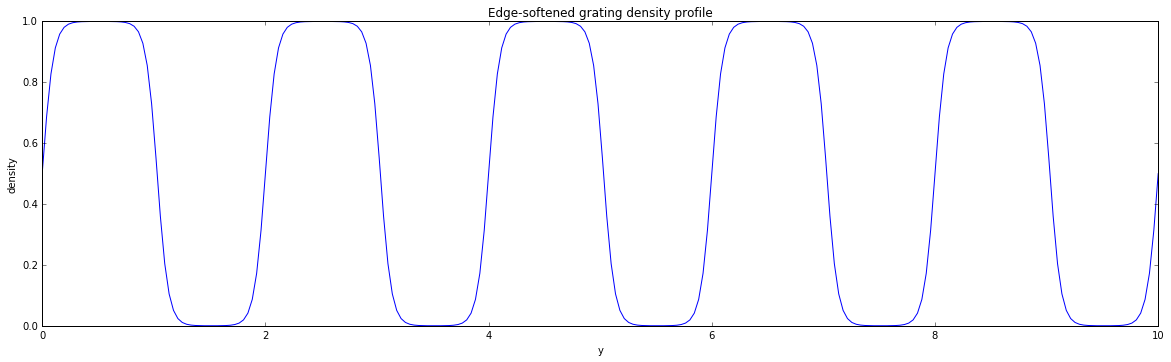

In [14]:
# Define edge softening parameter and make edge function
sigma         = 0.05
fct_y_edge    = make_fermilike_edge(sigma, 0.)

# Define grating parameters and make y density profile function
pitch         = 2.
fsize         = 1.03
fct_y_atom    = make_box(pitch, fsize, fct_y_edge)
fct_y_grating = make_periodical(pitch, fct_y_atom)

# Define y domain
yres          = 256
ymin          = 0.
ymax          = 10.
y             = np.linspace(ymin, ymax, yres)

# Calculate density sample
y_grating     = fct_y_grating(y)



# Plot
fig = plt.figure(figsize=(20, 12))

sub1 = fig.add_subplot(2, 1, 1)
sub1.set_title('Edge-softened grating density profile')
sub1.set_xlabel('y')
sub1.set_ylabel('density')
sub1.plot(y, y_grating)

## Create and plot 2D grating density

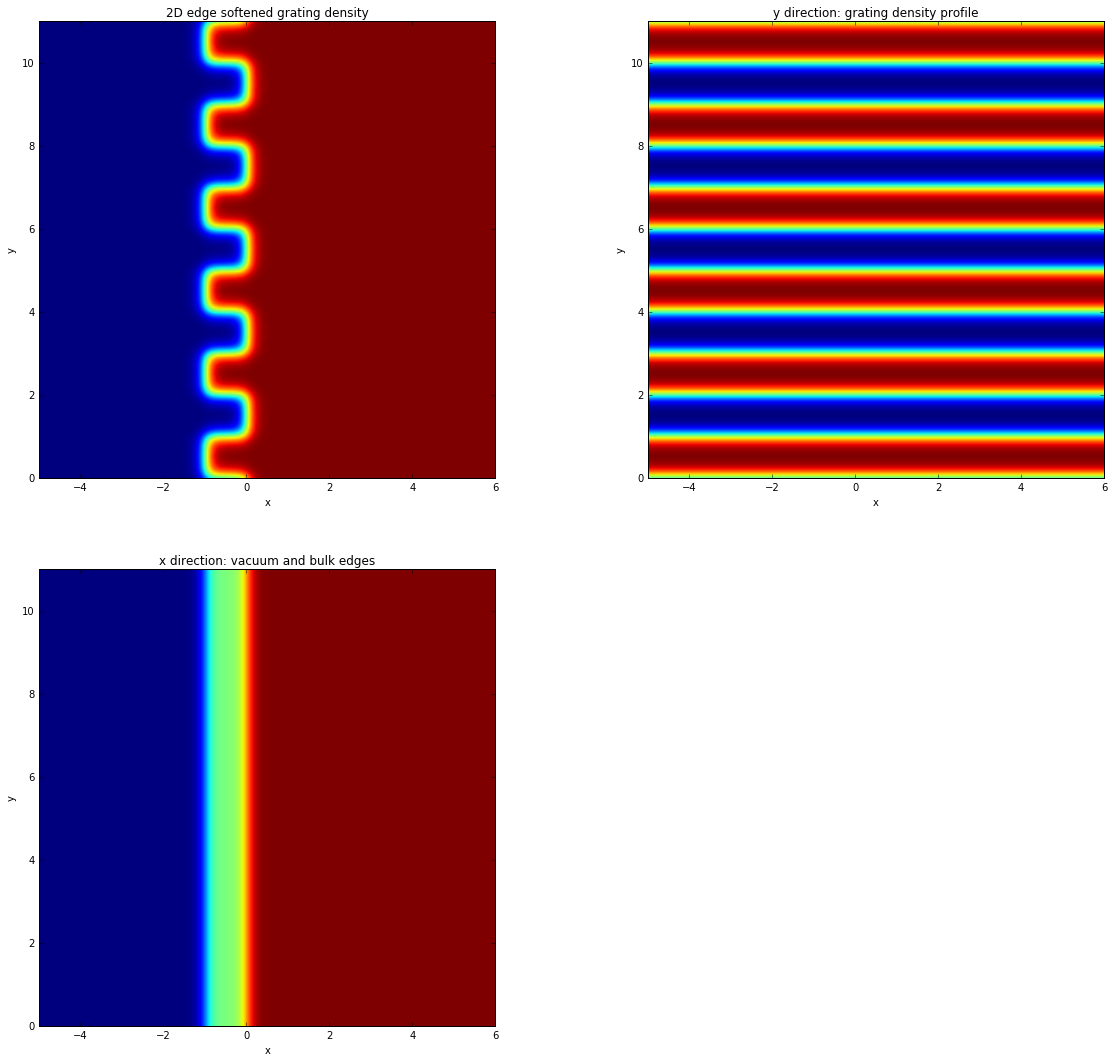

In [12]:
# Define grating and softening parameters
fsize           = 1.  # width of ridge / y-extent of feature
fheight         = 1.  # height of ridge / x-extent of feature
pitch           = 2.  # period length of grating (in y direction)
sigma_x         = 0.1 # characteristic length of edge softening along x direction
sigma_y         = 0.1 # characteristic length of edge softening along y direction
xbase           = 0.  # x position of bulk

# Create 2D grating density function
fct_y_edge      = make_edge(sigma_y, 0.)
fct_y_atom      = make_feat(pitch, fsize, fct_y_edge)
fct_y_grating   = make_periodical(pitch, fct_y_atom)
fct_x_edge      = make_edge(sigma_x, 0.)
fct_xy_density  = make_xy_softened_grating(fct_y_grating, fct_x_edge, xbase, fheight)

# Define x and y domains
xres            = 256
xmin            = -5.
xmax            = 6.
x               = np.linspace(xmin, xmax, xres)

yres            = 256
ymin            = 0.
ymax            = 11.
y               = np.linspace(ymin, ymax, yres)

xx, yy          = np.meshgrid(x, y)

# Calculate density function sample
xy_density      = fct_xy_density(xx, yy)

# Create and sample 2D density function with flat grating - for visualization
fct_y_flat      = lambda y : 0.5
fct_xy_flatdens = make_xy_softened_grating(fct_y_flat, fct_x_edge, xbase, fheight)
xy_flatdens     = fct_xy_flatdens(xx, yy)



# Plot
fig = plt.figure(figsize=(20, 18))
sub1 = fig.add_subplot(2, 2, 1)
sub1.set_title('2D edge softened grating density')
sub1.set_xlabel('x')
sub1.set_ylabel('y')
sub1.imshow(xy_density, origin='lower', extent=[xmin, xmax, ymin, ymax], aspect=1)

sub2 = fig.add_subplot(2, 2, 2)
sub2.set_title('y direction: grating density profile')
sub2.set_xlabel('x')
sub2.set_ylabel('y')
sub2.imshow(fct_y_grating(yy), origin='lower', extent=[xmin, xmax, ymin, ymax], aspect=1)

sub3 = fig.add_subplot(2, 2, 3)
sub3.set_title('x direction: vacuum and bulk edges')
sub3.set_xlabel('x')
sub3.set_ylabel('y')
sub3 = sub3.imshow(xy_flatdens, origin='lower', extent=[xmin, xmax, ymin, ymax], aspect=1)